<a href="https://colab.research.google.com/github/JuanCappelletti/Consteel_H06/blob/Flowmeter/KATFLOWmeter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Ejecutar librerias { run: "auto", display-mode: "form" }
from matplotlib.font_manager import json_dump
from numpy.matrixlib.defmatrix import N
from operator import truediv
import numpy as np
import pandas as pd
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from IPython.display import Image
import matplotlib.patches as mpatches
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)

In [2]:
#@title CARGA DE DATA_SET
Url = "https://raw.githubusercontent.com/JuanCappelletti/Consteel_H06/Flowmeter/23082023%20H2O_Drive%20.csv" #@param {type:"string"}
datos = pd.read_csv(Url,sep=",",decimal=".")
df=pd.DataFrame(datos)
dfx=df.copy()


In [ ]:
dfx.info()


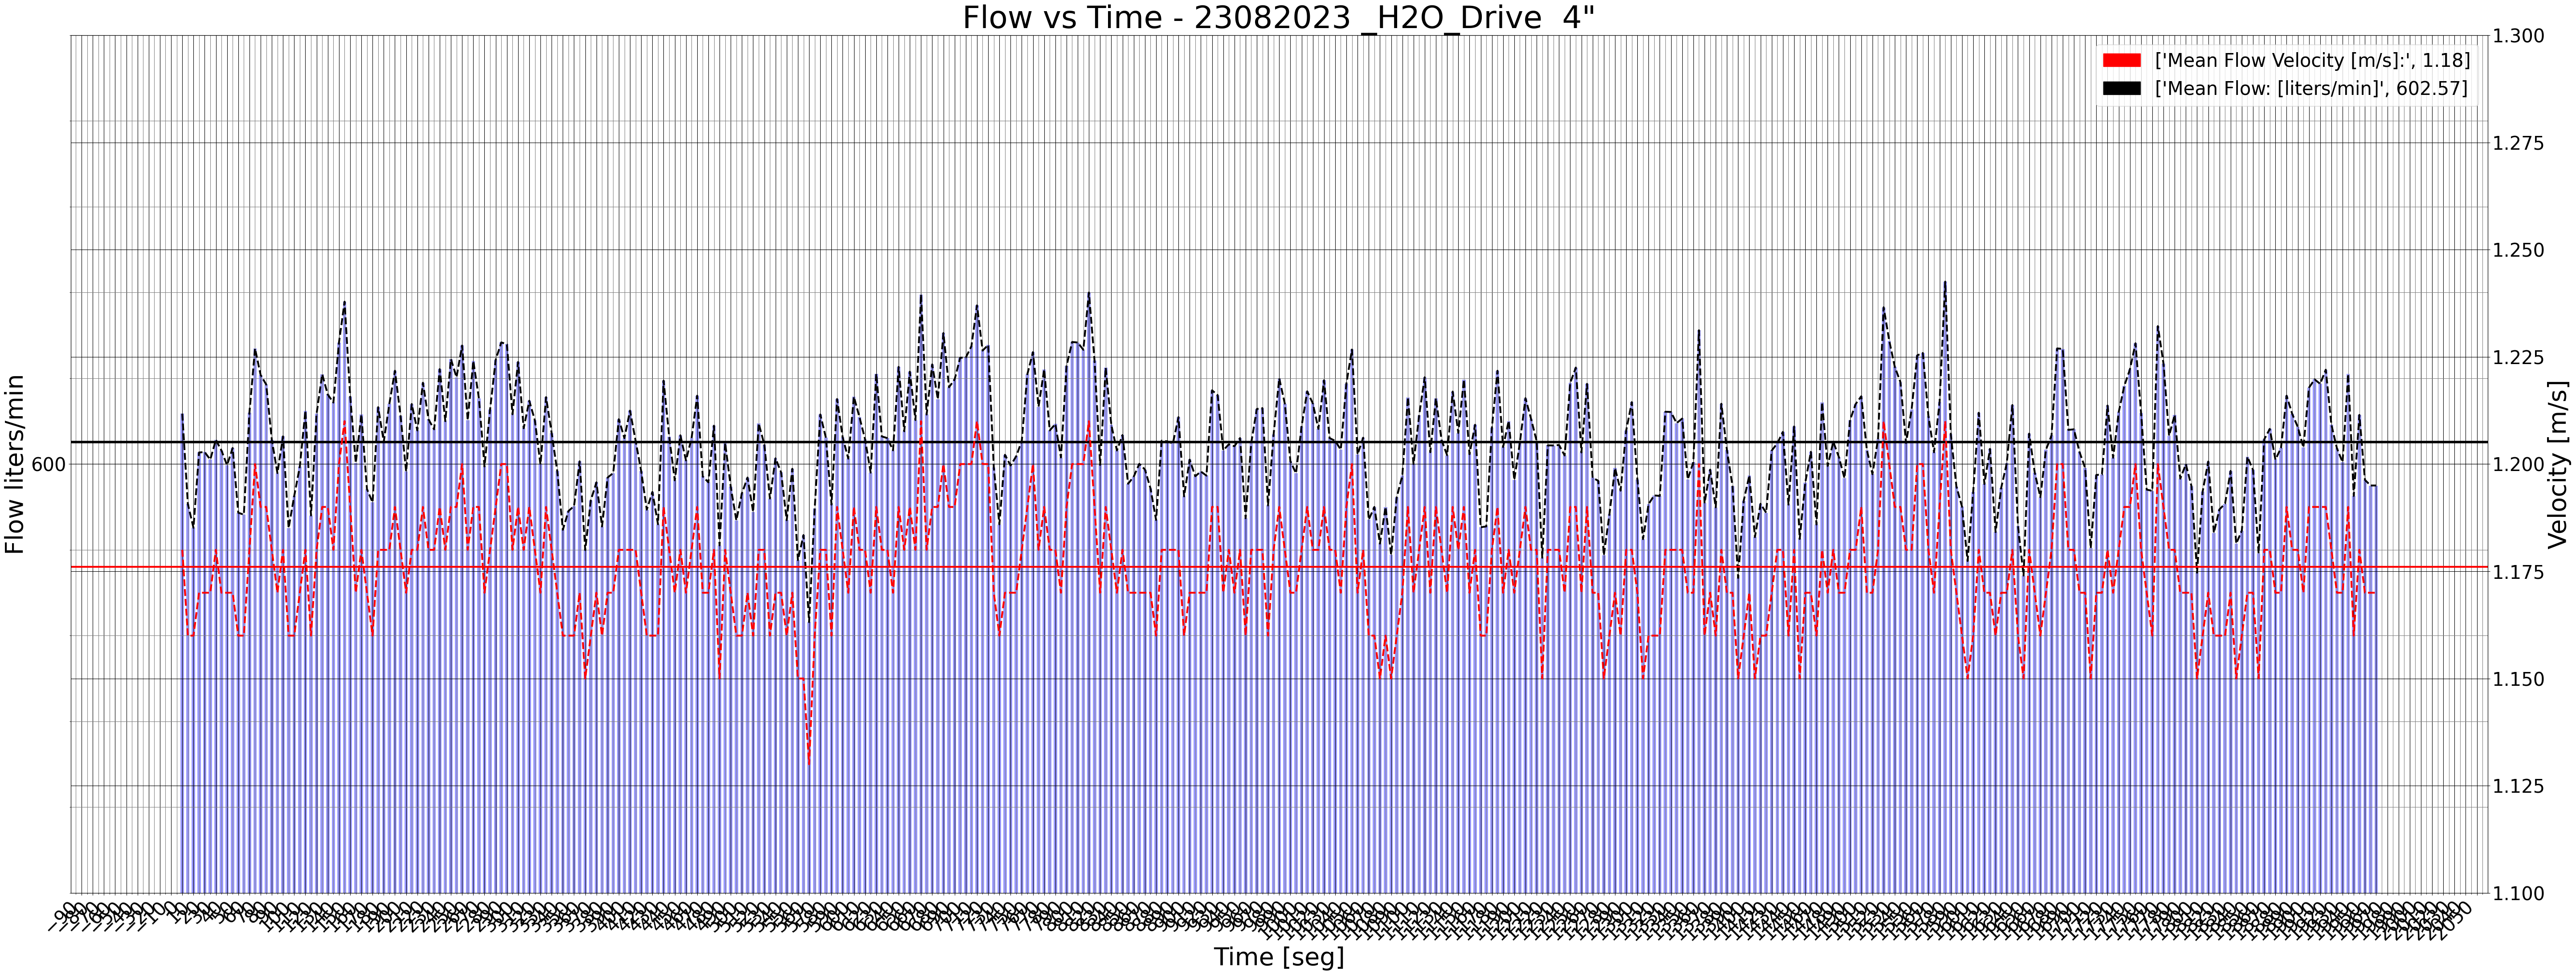

In [8]:
# @title Flow vs Time.
Name = "23082023 _H2O_Drive  4\"" #@param {type:"string"}
Export = True #@param {type:"boolean"}
QLimite_inf = 550 # @param {type:"number"}
QLimite_sup = 650 # @param {type:"number"}
Qcolor_bar = "blue" # @param {type:"raw"}
VLimite_inf = 1.10 # @param {type:"number"}
VLimite_sup = 1.3 # @param {type:"number"}
Vcolor_bar = "red" # @param {type:"raw"}

fig, (ax)= plt.subplots(1,1, figsize=(70,25))

ax.bar(dfx['Time'], (dfx['Flow_liters']), width=3,alpha=0.4, color=Qcolor_bar, linewidth=0.4)
ax.set(ylim=(QLimite_inf, QLimite_sup))
ax.plot(dfx['Time'],dfx['Flow_liters'],linewidth=3,color='black',linestyle='--')

twin_axes = ax.twinx()
twin_axes.plot(dfx['Time'], dfx['Velocity'], color=Vcolor_bar,linewidth=3,linestyle='--')
twin_axes.set(ylim=(VLimite_inf, VLimite_sup))
twin_axes.set_ylabel('Velocity [m/s]', color='black',fontsize=40)
twin_axes.axhline(y=np.mean(dfx['Velocity']),linewidth=3,color='r')

twin_axes.grid(True, which='minor',color='grey',axis='both')
twin_axes.grid(True, which='major',color='black',axis='both')

text='Time [seg]'
text1='Flow liters/min'
ax.yaxis.set_major_locator(MultipleLocator(100),)
ax.yaxis.set_minor_locator(MultipleLocator(10),)

ax.xaxis.set_major_locator(MultipleLocator(10),)
ax.xaxis.set_minor_locator(MultipleLocator(5),)

ax.axes.grid(True, which='minor',color='grey',axis='both')
ax.axes.grid(True, which='major',color='black',axis='both')

ax.axhline(y=np.mean(dfx['Flow_liters']),linewidth=4,color='black')

labels2 = ax.get_xticklabels()
labels1= ax.get_yticklabels()
labels3= twin_axes.get_yticklabels()
plt.setp(labels1,fontsize=30, horizontalalignment='right')
plt.setp(labels3,fontsize=30, horizontalalignment='left')
plt.setp(labels2, rotation=45,fontsize=30, horizontalalignment='right')

ax.set_title(('Flow vs Time - '+ Name),fontsize=50)
ax.set_xlabel(text,fontsize=40)
ax.set_ylabel(text1,fontsize=40)

red_patch = mpatches.Patch(color='red', label=['Mean Flow Velocity [m/s]:', np.around(np.mean(dfx['Velocity']),2)])
black_patch = mpatches.Patch(color='black', label=['Mean Flow: [liters/min]', np.around(np.mean(dfx['Flow_liters']),2)])
ax.legend(handles=[red_patch,black_patch],fontsize=30)

ax.autoscale_view()
if Export==1:
 y=str(Name)+"_"+".jpg"
 fig.savefig(y)

fig.show()
